In [1]:
import numpy as np
print("numpy version - {}".format(np.__version__))
import pandas as pd
print("pandas version - {}".format(pd.__version__))
import matplotlib
print("matplotlib version - {}".format(matplotlib.__version__))
import matplotlib.pyplot as plt
import seaborn as sns
print("seaborn version - {}".format(sns.__version__))
import tensorflow as tf
print("tensorflow version - {}".format(tf.__version__))
%matplotlib inline

numpy version - 1.17.2
pandas version - 0.25.1
matplotlib version - 3.1.1
seaborn version - 0.9.0
tensorflow version - 2.0.0


In [2]:
data_path = '/home/vlad/.data/house_price'

In [3]:
!ls /home/vlad/.data/house_price

data_description.txt				 test.csv
house-prices-advanced-regression-techniques.zip  train.csv
sample_submission.csv


In [4]:
train = pd.read_csv(data_path + '/train.csv')
test = pd.read_csv(data_path + '/test.csv')

In [5]:
print("train data shape {}".format(train.shape))
train.info()

train data shape (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object

In [6]:
print("test data shape {}".format(test.shape))
test.info()

test data shape (1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

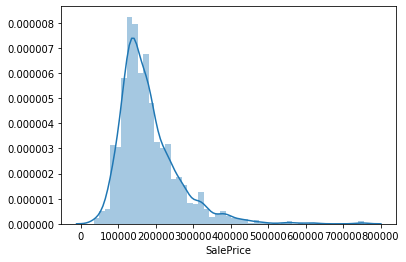

In [9]:
sns.distplot(train.SalePrice);

In [10]:
print("Skewness: {}\nKurtosis: {}".format(train.SalePrice.skew(), train.SalePrice.kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


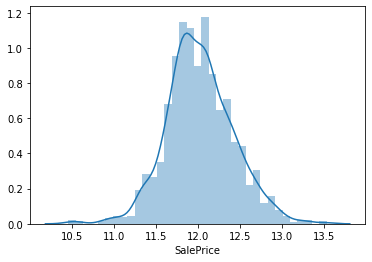

In [11]:
sns.distplot(np.log(train.SalePrice));

In [12]:
print("Skewness: {}\nKurtosis: {}".format(np.log(train.SalePrice).skew(), np.log(train.SalePrice).kurt()))

Skewness: 0.12133506220520406
Kurtosis: 0.8095319958036296


In [13]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [14]:
def percent_value_count(df, feature):
    percent = pd.DataFrame(round(df.loc[:, feature].value_counts(dropna=False, normalize=True) * 100, 2))
    total = pd.DataFrame(df.loc[:, feature].value_counts())
    
    percent.columns=['percent']
    total.columns=['Total']
    return pd.concat([total, percent], axis=1)

In [15]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

In [16]:
mis_per_train = missing_percentage(train)
mis_per_train[mis_per_train['Total'] != 0]

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [17]:
mis_per_test = missing_percentage(test)
mis_per_test[mis_per_test['Total'] != 0]

,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageCond,78,5.35
GarageQual,78,5.35
GarageYrBlt,78,5.35
GarageFinish,78,5.35


In [18]:
list(mis_per_train[mis_per_train['Percent'] > 10].index), list(mis_per_test[mis_per_test['Percent'] > 10].index) 

(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'],
 ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'])

In [19]:
train.drop(columns=list(mis_per_train[mis_per_train['Percent'] > 10].index), axis=1, inplace=True)

In [20]:
test.drop(columns=list(mis_per_train[mis_per_train['Percent'] > 10].index), axis=1, inplace=True)

In [22]:
mis_per_train = missing_percentage(train); mis_per_test = missing_percentage(test)

In [23]:
list(mis_per_train[mis_per_train['Percent'] > 10].index), list(mis_per_test[mis_per_test['Percent'] > 10].index) 

([], [])